# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [25]:
boston_df['CHAS'].unique()

array([0., 1.])

In [26]:
boston_df['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [7]:
boston_df.shape

(506, 14)

In [11]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [19]:
boston_df.duplicated().count()

506

<AxesSubplot:ylabel='MEDV'>

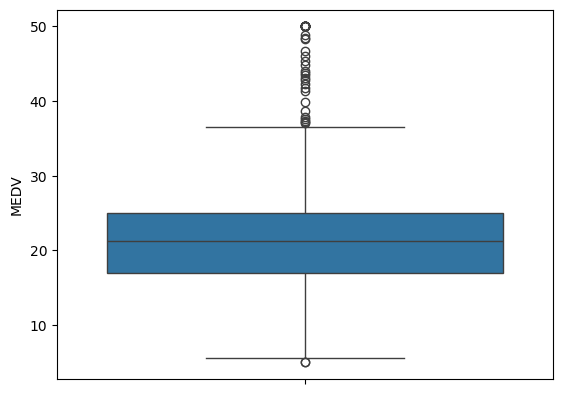

In [20]:
sns.boxplot(boston_df['MEDV'])

<BarContainer object of 2 artists>

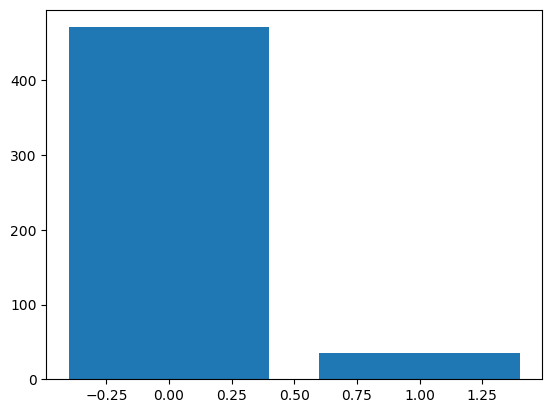

In [30]:
sorted_counts = boston_df['CHAS'].value_counts().sort_index()
pyplot.bar(sorted_counts.index, sorted_counts.values)

In [34]:
boston_df.loc[boston_df['AGE'] <= 35, 'cat_age'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'cat_age'] = 'between 35 and 70'
boston_df.loc[boston_df['AGE'] > 70, 'cat_age'] = 'older than 70'

<AxesSubplot:xlabel='cat_age', ylabel='MEDV'>

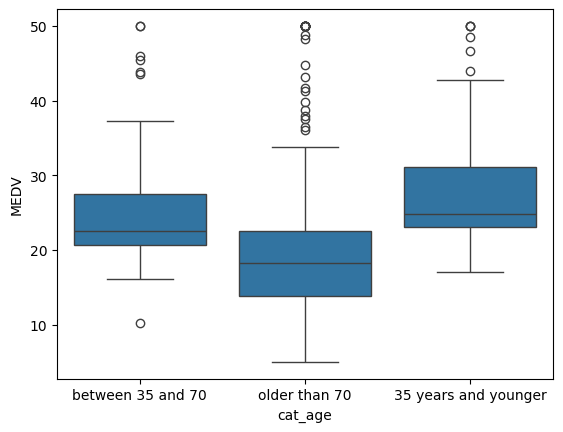

In [37]:
sns.boxplot(x='cat_age',y='MEDV', data=boston_df)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

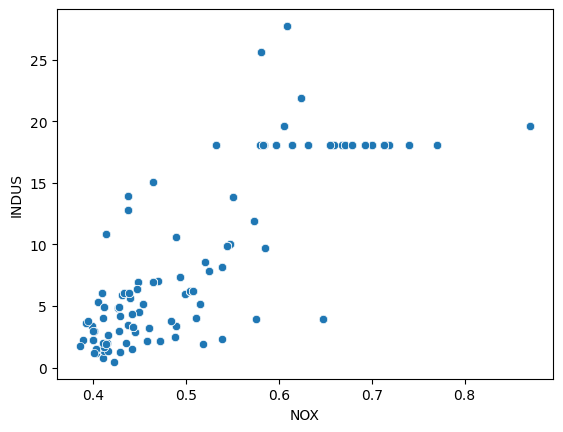

In [38]:
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])

**As NOX increases, INDUS increases too, there is correlation which may be explored**

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

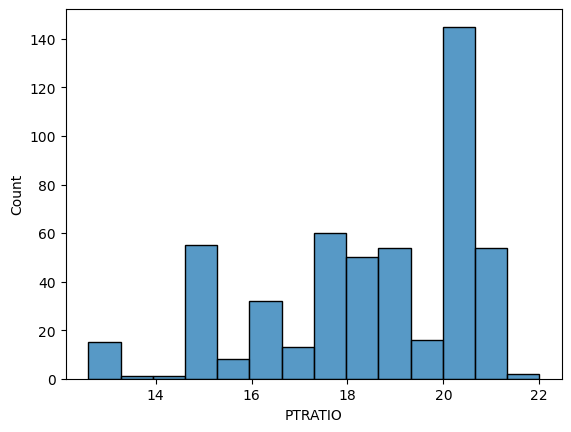

In [43]:
sns.histplot(boston_df['PTRATIO'])

In [46]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**The difference is statistically significant, pvalue<0.05.**
**The negative sign indicates that the first group's mean is lower than the second group's mean**
**Degrees of freedom = 504. This suggests a relatively large sample size**

In [48]:
scipy.stats.levene(boston_df[boston_df['cat_age'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['cat_age'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['cat_age'] == 'older than 70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

**This is not statistically significant at the common alpha level of 0.05, we fail to reject the null hypothesis.**

In [51]:
boston_df[['NOX', 'INDUS']].corr(method='pearson')

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


**There is strong positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town**

In [52]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        23:43:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Very low R-squared (6.2%): Distance alone explains very little of home price variation 

F-statistic = 33.58, p = 1.21e-08: The overall model is statistically significant

DIS t-statistic = 5.795, p = 0.000: The relationship with distance is significant

For each unit increase in distance to employment centers, home values increase by $1,092

This is statistically significant (p < 0.0001)